# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(),'data','adultData.csv')
df = pd.read_csv(filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Finding where the missing values are
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [ ]:
# The category with the most missing values is workclass and occupation
# I haven't included either of these in my feature list so I do not need to worry about them
# I did include hours-per-week in my feature list

In [5]:
# Dropping the categories that I am not using as my features
df = df.drop(['workclass', 'fnlwgt',
 'occupation', 'relationship', 'sex_selfID',
       'capital-gain', 'capital-loss',  'native-country'], axis = 1)

In [6]:
new_nan_count = np.sum(df.isnull(), axis = 0)
new_nan_count

age               162
education           0
education-num       0
marital-status      0
race                0
hours-per-week    325
income_binary       0
dtype: int64

In [ ]:
# Because there are so many missing values, instead of just dropping the entries I will fill
# fill the nulls in with the mean

In [7]:
# Filling in the ages NaNs
mean_ages = df['age'].mean()
df['age'].fillna(value = mean_ages, inplace = True)

In [8]:
# Filling in the hours-per-week NaNs
mean_hpw = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value = mean_hpw, inplace = True)

In [9]:
# Checking if there is any more nans
final_nan_count = np.sum(df.isnull(), axis = 0)
final_nan_count

age               0
education         0
education-num     0
marital-status    0
race              0
hours-per-week    0
income_binary     0
dtype: int64

In [10]:
# Now I am going to look at the marital status categories
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [11]:
# I want to see how many people are in each category
df_count = df['marital-status'].value_counts()

<AxesSubplot:>

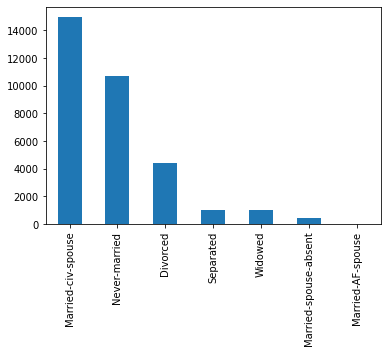

In [12]:
df_count.plot.bar()

In [13]:
# I'm gonna consolidate the married categories because I am not really interested in the
# specifics of their marriage, whether their spouse is in the armed forces or whether they 
# are absent

# I will start by renaming the married-civ-spouse category
df['marital-status'] = df['marital-status'].replace({'Married-civ-spouse':'Married'})

In [14]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Married-spouse-absent',
       'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [15]:
# Now I will rename the other two categories to 'married'
df['marital-status'] = df['marital-status'].replace({'Married-spouse-absent':'Married',
                                                    'Married-AF-spouse':'Married'})

In [16]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Separated', 'Widowed'],
      dtype=object)

In [17]:
# I am pretty sure there are no outliers because most of my features are categorical but I will
# check just in case

df['age'].unique()


array([39.        , 50.        , 38.        , 53.        , 28.        ,
       37.        , 49.        , 52.        , 31.        , 42.        ,
       30.        , 23.        , 32.        , 40.        , 34.        ,
       25.        , 43.        , 54.        , 35.        , 59.        ,
       56.        , 19.        , 20.        , 45.        , 22.        ,
       48.        , 21.        , 24.        , 57.        , 44.        ,
       41.        , 29.        , 38.58921572, 18.        , 47.        ,
       46.        , 36.        , 79.        , 27.        , 67.        ,
       33.        , 76.        , 17.        , 55.        , 61.        ,
       70.        , 64.        , 71.        , 68.        , 66.        ,
       51.        , 58.        , 26.        , 60.        , 90.        ,
       75.        , 65.        , 77.        , 62.        , 63.        ,
       80.        , 72.        , 74.        , 69.        , 73.        ,
       81.        , 78.        , 88.        , 82.        , 83.  

<AxesSubplot:>

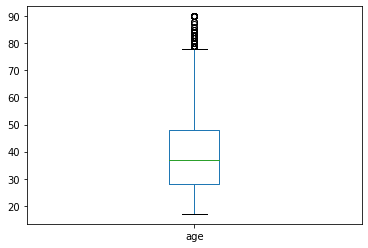

In [18]:
df['age'].plot.box()
# I was wrong, people over 70-80 years old are considered outliers in the data
# It is difficult to see the exact cutoff for outliers so I will make the plot bigger and add
# more ticks

([<matplotlib.axis.YTick at 0x7fbbe8e7d320>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

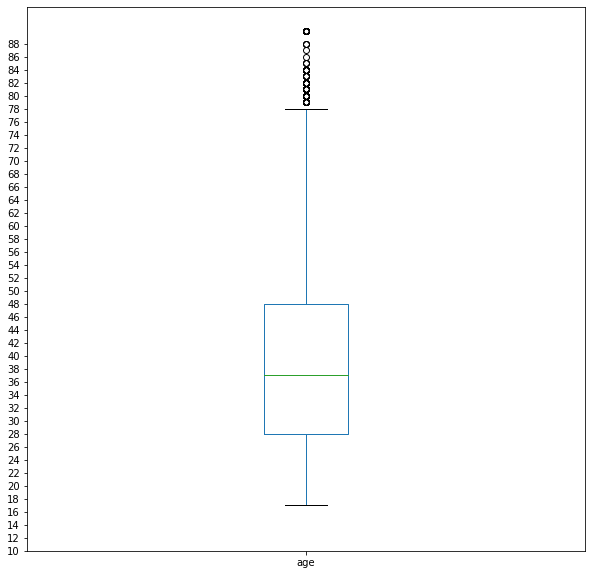

In [19]:
df['age'].plot.box(figsize = (10,10))
plt.yticks(range(10,90,2))
# It seems that 78 is the cutoff and everything above 78 is an outlier

In [20]:
# Dropping the age outliers
df = df[df['age'] < 79]

In [21]:
# Checking if it worked
df[df['age'] == 80]

,age,education,education-num,marital-status,race,hours-per-week,income_binary


<AxesSubplot:>

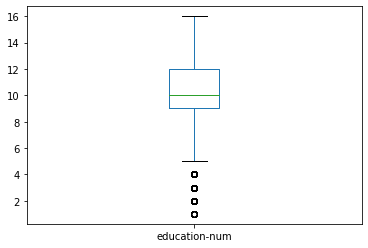

In [22]:
# Seeing if there are any outliers in education-num category
df['education-num'].plot.box()

In [23]:
# Dropping the education-num outliers 
df = df[df['education-num'] > 4]

In [24]:
# Checking if it worked
df[df['education-num'] == 4]

,age,education,education-num,marital-status,race,hours-per-week,income_binary


<AxesSubplot:>

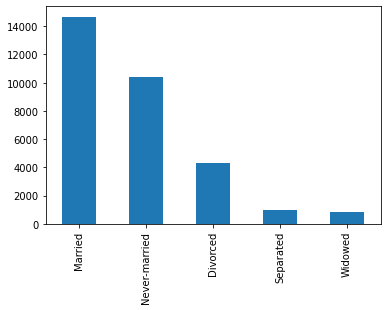

In [25]:
# I noticed that there seems to be a class imbalance in the marital status category, with 
# there being a lot more married people than divorced, separated, widowed
new_df_count = df['marital-status'].value_counts()
new_df_count.plot.bar()

In [26]:
new_df_count

Married          14675
Never-married    10401
Divorced          4333
Separated          973
Widowed            859
Name: marital-status, dtype: int64

In [27]:
# I am going to upsample each category to the amount in my majority class to get rid of the 
# class imbalance
# I am choosing to upsample rather than downsample because the dataset is not very large
df = df.groupby(['marital-status']).sample(14675, replace = True)


In [28]:
df

,age,education,education-num,marital-status,race,hours-per-week,income_binary
32313,41.0,Some-college,10,Divorced,White,40.0,<=50K
22023,32.0,Some-college,10,Divorced,White,45.0,<=50K
25392,57.0,Masters,14,Divorced,Black,40.0,<=50K
30218,45.0,HS-grad,9,Divorced,White,40.0,<=50K
8354,35.0,10th,6,Divorced,White,60.0,<=50K
...,...,...,...,...,...,...,...
13030,54.0,HS-grad,9,Widowed,White,40.0,<=50K
23943,65.0,12th,8,Widowed,White,44.0,<=50K
30250,64.0,HS-grad,9,Widowed,White,8.0,<=50K
15269,62.0,HS-grad,9,Widowed,White,38.0,<=50K


In [29]:
# checking if the upsampling worked
final_counts = df['marital-status'].value_counts()
final_counts

Never-married    14675
Married          14675
Separated        14675
Widowed          14675
Divorced         14675
Name: marital-status, dtype: int64

In [ ]:
# I tried out the grid search but then realized that I have to add one hot encoding in order
# for it to work

In [ ]:
### One Hot Encoding the Data

In [30]:
# Seeing what my columns are
df.columns

Index(['age', 'education', 'education-num', 'marital-status', 'race',
       'hours-per-week', 'income_binary'],
      dtype='object')

In [31]:
# Seeing the types of each column
df.dtypes

age               float64
education          object
education-num       int64
marital-status     object
race               object
hours-per-week    float64
income_binary      object
dtype: object

In [32]:
# Find all the object columns
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)

# At first I removed marital-status, but then I realized I need that to be an object for the 
# label
to_encode.remove('marital-status')

['education', 'marital-status', 'race', 'income_binary']


In [38]:
print(to_encode)

['education', 'race', 'income_binary']


In [33]:
# Checking if there are not too many different values
df[to_encode].nunique()

education        12
race              5
income_binary     2
dtype: int64

In [34]:
# Creating the encoder
encoder = OneHotEncoder(handle_unknown = 'error', sparse = False)

# Applying the encoder
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))

# Reinstate original column names
df_enc.columns = encoder.get_feature_names(to_encode)

In [35]:
# Looking at the encoded columns
df_enc.head()

,education_10th,education_11th,education_12th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,income_binary_<=50K,income_binary_>50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [36]:
# Merge with the original dataframe and drop the object columns
df = df.join(df_enc)

df.drop(columns = to_encode, axis = 1, inplace = True)

In [37]:
# Looking at the columns
df.columns

Index(['age', 'education-num', 'marital-status', 'hours-per-week',
       'education_10th', 'education_11th', 'education_12th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Prof-school', 'education_Some-college',
       'race_Amer-Indian-Inuit', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'income_binary_<=50K',
       'income_binary_>50K'],
      dtype='object')

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [39]:
# Creating my features and labels
y = df['marital-status']
X = df.drop(columns = 'marital-status', axis = 1)

In [40]:
# Splitting my data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 1234)

In [41]:
# I am going to run a grid search algorithm to find the best hyperparameter
# Creating the hyperparameter grid
param_grid = {'max_depth':[2,5,10,15,20],'min_samples_leaf':[10,20,30,40,50]}
param_grid

{'max_depth': [2, 5, 10, 15, 20], 'min_samples_leaf': [10, 20, 30, 40, 50]}

In [42]:
print('Running the Grid Search')

model = RandomForestClassifier(criterion = 'entropy', n_estimators = 20)

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running the Grid Search
Done


In [43]:
# finding the optimal hyperparameters
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 10}

In [44]:
# Accuracy score, not very accurate but okay
grid_search.best_score_

0.6032829621646509

In [49]:
# Now that we know the the best hyperparameters, I want to use the precision metric to 
# evaluate how well the model is able to predict if someone is married
#I am going to construct a confusion matrix to figure it out
model = RandomForestClassifier(criterion = 'entropy', n_estimators = 20, max_depth = 20,
                              min_samples_leaf = 10)

model.fit(X_train, y_train)

class_label_predictions = model.predict(X_test)

In [50]:
# Finding the accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)

In [52]:
acc_score

0.6219129429255802

In [62]:
print('Confusion Matrix')

pd.DataFrame(
confusion_matrix(y_test, class_label_predictions, labels = ['Never-married', 'Married', 
                 'Separated', 'Widowed', 'Divorced']),
                 columns=['P: Never-Married', 'P: Married','P: Separated','P: Widowed',
                         'P: Divorced'], index = ['A: Never-Married','A: Married',
                                                 'A: Separated','A: Widowed', 'A: Divorced']
                )


Confusion Matrix


,P: Never-Married,P: Married,P: Separated,P: Widowed,P: Divorced
A: Never-Married,3338,458,492,139,383
A: Married,650,1679,761,781,945
A: Separated,386,328,3562,272,289
A: Widowed,54,110,205,4321,144
A: Divorced,412,819,866,661,2159


In [ ]:
# Precision is the number of true positives over the number of true postives and false 
#positives

In [63]:
1679/(650+1679+761+781+945)
# The precision for the key value that I am predicting is not very good
# The accuracy for the overall model seems to be better

0.3486295681063123

In [71]:
# This model is okay, but it is not very good for predicting the key value of whether
# someone is married or not
precision_never_married = 3338/(3338+458+492+139+383)
precision_separated = 3562/(386+328+3562+272+289)
precision_widowed = 4321/(54+110+205+4321+144)
precision_divorced = 2159/(412+819+866+661+2159)

In [68]:
precision_never_married

0.693970893970894

In [69]:
precision_separated

0.736406863758528

In [70]:
precision_widowed

0.8938767066611502

In [72]:
precision_divorced

0.4390888753304861

In [ ]:
# The model seems to be best at predicting whether someone is widowed
# Perhaps this has to do with the use of the age feature